In [10]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [11]:
# 자전거 스테이션 정보 불러오기 
station1 = pd.read_csv('datas/location_2021.csv', encoding='cp949')
station1

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


컬럼명도 정리가 안되어있고, 결측치 데이터가 너무 많습니다. 컬럼명 정리와 결측치 데이터 채워넣고, 필요없는 컬럼은 제거 하겠습니다.

In [3]:
# 컬럼명 지정
station = station1.rename(columns={'대여소\n번호':'대여소번호', '보관소(대여소)명':'대여소명', '소재지(위치)':'위치', 'Unnamed: 3':'상세주소', 
                        'Unnamed: 4':'위도', 'Unnamed: 5':'경도', '설치\n시기':'설치시기', '설치형태':'설치형태(LCD)', 'Unnamed: 8':'설치형태(QR)', 
                                   '운영\n방식':'운영방식'})
station

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 불필요한 컬럼제거 
station = station.drop(['설치형태(LCD)', '설치형태(QR)', '운영방식'], axis=1)
station

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07
...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 결측치 데이터 제거
station = station.dropna(axis=0)
station

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07
...,...,...,...,...,...,...,...
2153,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13
2154,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10
2155,1088.0,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13


In [16]:
# 결측치 데이터까지 제거 완료된 스테이션 정보 CSV파일로 저장하기
station.to_csv('station.csv', index=False)

In [12]:
# 정리된 CSV 파일 불러오기
station = pd.read_csv('station.csv')
station

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07
...,...,...,...,...,...,...,...
2035,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13
2036,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10
2037,1088.0,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14
2038,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13


In [13]:
station['대여소번호'].value_counts()

743.0     1
1362.0    1
562.0     1
904.0     1
2644.0    1
         ..
1285.0    1
2917.0    1
1411.0    1
237.0     1
431.0     1
Name: 대여소번호, Length: 2040, dtype: int64

In [15]:
# 스테이션 위치 확인 (unique()로 유일한값 찾기)
station['위치'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [16]:
location = station['위치'].value_counts()
location

송파구     129
강서구     120
강남구     118
서초구     118
영등포구    106
마포구      98
종로구      94
노원구      88
구로구      86
강동구      84
양천구      80
은평구      77
성동구      76
서대문구     74
성북구      72
광진구      71
중랑구      70
동대문구     67
관악구      65
중구       65
동작구      62
용산구      60
금천구      55
도봉구      54
강북구      51
Name: 위치, dtype: int64

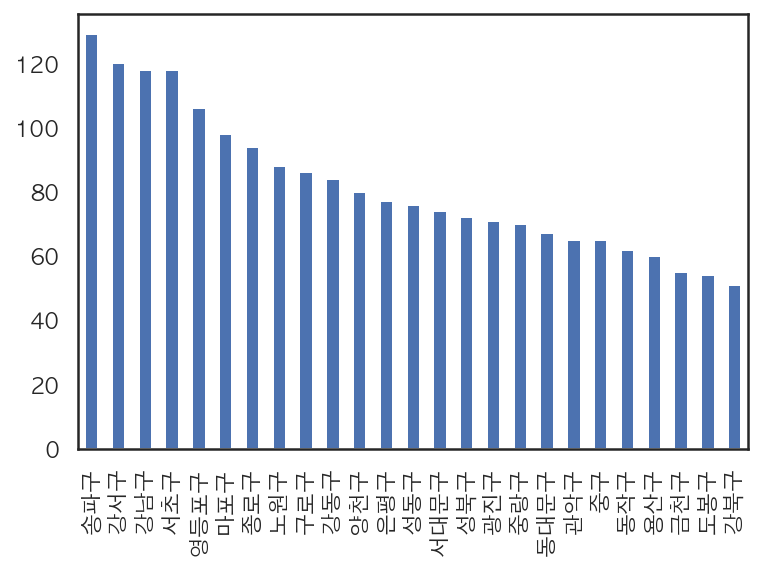

In [18]:
location.plot.bar()
plt.rc('font',family='AppleGothic')

plt.show()

In [19]:
mapo = station.loc[station['위치'] == '마포구']
mapo

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기
919,101.0,(구)합정동 주민센터,마포구,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06
920,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06
921,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06
922,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06
923,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06
...,...,...,...,...,...,...,...
1012,3008.0,DMC역7번출구,마포구,마포구 상암동 1133,37.577114,126.898361,2020-04-06
1013,3009.0,서교동사거리,마포구,마포구 서교동 418,37.555840,126.920433,2020-04-12
1014,3010.0,홍대입구역 3번출구,마포구,마포구 동교동 155-27,37.558296,126.925385,2020-04-12
1015,3011.0,경의선(노고산동),마포구,마포구 노고산동 112-12,37.553429,126.933792,2020-04-08


In [33]:
mapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 919 to 1016
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   98 non-null     float64
 1   대여소명    98 non-null     object 
 2   위치      98 non-null     object 
 3   상세주소    98 non-null     object 
 4   위도      98 non-null     float64
 5   경도      98 non-null     float64
 6   설치시기    98 non-null     object 
dtypes: float64(3), object(4)
memory usage: 6.1+ KB


In [27]:
mapo1 = mapo['대여소명']

In [28]:
mapo1 = list(mapo1)

In [29]:
mapo1

['(구)합정동 주민센터',
 '망원역 1번출구 앞',
 '망원역 2번출구 앞',
 '합정역 1번출구 앞',
 '합정역 5번출구 앞',
 '합정역 7번출구 앞',
 '신한은행 서교동금융센터점 앞',
 '서교동 사거리',
 '제일빌딩 앞',
 '상수역 2번출구 앞',
 '극동방송국 앞',
 '홍대입구역 8번출구 앞',
 '광흥창역 2번출구 앞',
 '서강나루 공원',
 '신수동 사거리',
 '마포소방서 앞',
 '신성기사식당 앞',
 '서강대 정문 건너편',
 '서강대 남문 옆',
 '서강대 후문 옆',
 '현대벤처빌 앞',
 '신촌역(2호선) 6번출구 옆',
 '신촌역(2호선) 7번출구 앞',
 '대흥동 주민센터',
 '아현역 4번출구 앞',
 '공덕역 2번출구',
 '공덕역 8번출구',
 '공덕역 5번출구',
 '마포역 2번출구 뒤',
 '마포역 4번출구 뒤',
 '용강동 주민센터 앞',
 '서강대역 2번출구 앞',
 '망원1동주민센터',
 '마포구민체육센터 앞',
 '성산2교 사거리',
 '마포구청역',
 '가좌역1 번출구 뒤',
 '서울서부지방법원 앞',
 '애오개역 4번출구 앞',
 '망원초록길 입구',
 '망원2빗물펌프장 앞',
 '하늘채코오롱아파트 건너편',
 'SK망원동주유소 건너편',
 '마포 신수공원 앞',
 '월드컵공원',
 '서울 월드컵 경기장',
 '상암한화오벨리스크 1차 앞',
 '상암월드컵파크 10단지 앞',
 '상암월드컵파크 9단지 앞',
 '부엉이공원 앞',
 'DMC빌 앞',
 '상암월드컵파크 7단지 앞',
 '마포구 육아종합지원센터',
 'LG CNS앞',
 '누리꿈스퀘어 옆',
 '상암중학교 옆',
 'DMC홍보관',
 'DMC산학협력연구센터 앞',
 '상암월드컵파크 3단지 후문',
 '상암동주민센터 옆',
 'DMC역 9번출구 앞',
 '상암월드컵파크 1단지 교차로',
 'DMC역 2번출구 옆',
 '월드컵경기장역 3번출구 옆',
 '홈플러스 앞',
 '서울시 공공자전거 상암센터',
 '마포구청 앞',
 '문화비축기지',
 

In [34]:
mapo2 = mapo['대여소번호'].astype(int)

In [35]:
mapo2 = list(mapo2)

In [36]:
mapo2

[101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 111,
 112,
 114,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 129,
 130,
 136,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 181,
 182,
 183,
 184,
 185,
 186,
 199,
 400,
 401,
 402,
 403,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 424,
 425,
 426,
 427,
 432,
 436,
 437,
 438,
 439,
 440,
 487,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 497,
 498,
 3002,
 3003,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3011,
 4202]

In [40]:
len(mapo1)

98

In [39]:
len(mapo2)

98

In [21]:
list(mapo[:3].iterrows())

[(919,
  대여소번호                 101.0
  대여소명            (구)합정동 주민센터
  위치                      마포구
  상세주소     서울특별시 마포구 동교로8길 58
  위도                37.549561
  경도               126.905754
  설치시기             2015-09-06
  Name: 919, dtype: object),
 (920,
  대여소번호                102.0
  대여소명            망원역 1번출구 앞
  위치                     마포구
  상세주소     서울특별시 마포구 월드컵로 72
  위도               37.555649
  경도              126.910629
  설치시기            2015-09-06
  Name: 920, dtype: object),
 (921,
  대여소번호                103.0
  대여소명            망원역 2번출구 앞
  위치                     마포구
  상세주소     서울특별시 마포구 월드컵로 79
  위도               37.554951
  경도              126.910835
  설치시기            2015-09-06
  Name: 921, dtype: object)]

In [22]:
location = np.array([37.5665, 126.9780]) # 위도, 경도 값
m_1 = folium.Map(location, zoom_start=12)
m_1

In [ ]:
m_2 = folium.Map(location, zoom_start=12)

for idx, data in mapo[:3].iterrows():
    
    lat, lng = data.'위도', data.'경도'
    color = 'red' 